# Análisis Exploratorio de Datos - Clasificación de Precios de Celulares

Este notebook contiene un análisis exploratorio del dataset de clasificación de precios de celulares. Vamos a:
- Explorar la estructura de los datos
- Limpiar y preparar los datos
- Realizar análisis estadístico
- Crear visualizaciones
- Identificar patrones y oportunidades de análisis

## 1. Importación de Librerías

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Carga de Datos

## DETALLES DEL EDA INICIAL

### Descripción del Conjunto de Datos
- **Fuente**: Dataset de especificaciones técnicas de teléfonos celulares
- **Contexto**: Contiene características técnicas y rangos de precio de dispositivos móviles
- **Objetivo**: Clasificar celulares en rangos de precio basándose en sus especificaciones
- **Aplicación**: Estrategias de pricing y posicionamiento de productos en el mercado

In [2]:
# Este comando conecta colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/clasificacion_precio_celulares.csv"
df = pd.read_csv(path)

## 3. Información General del Dataset

In [4]:
# Información sobre tipos de datos
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null

In [5]:
# Nombres de las columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


## 4. Limpieza de Nombres de Columnas

In [6]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Nombres de columnas actualizados:")
print(df.columns.tolist())

Nombres de columnas actualizados:
['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


## 5. Análisis de Valores Nulos

In [7]:
 #Identificar si exiten valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


## 6. Análisis de Duplicados

In [8]:
# Revisar duplicados.
duplicados_totales = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados_totales}")

Total de filas duplicadas: 0


## 7. Análisis de Espacios Vacíos y Valores Inconsistentes

In [9]:
# Verificar espacios vacíos en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

print("Análisis de espacios vacíos en columnas de texto:")
for col in columnas_texto:
    # Contar espacios vacíos
    espacios_vacios = df[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        print(f"\n{col}: {espacios_vacios} espacios vacíos")

    # Verificar valores únicos (primeros 10)
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos} valores únicos")
    if valores_unicos < 20:
        print(f"Valores: {df[col].value_counts().head(10).to_dict()}")

Análisis de espacios vacíos en columnas de texto:


## 8. Estadísticas Descriptivas

In [10]:
# Estadísticas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe().T

Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


## 9. Análisis de la Variable Objetivo (Price Range)

In [ ]:
#Sirve para encontrar la columna que contiene los precios o rangos de precio
# Mostrar todas las columnas para ver cuáles existen
print("Todas las columnas del dataset:")
print(df.columns.tolist())

# Mostrar las primeras filas para ver los datos
print("\nPrimeras 5 filas:")
print(df.head())

# Si hay una columna que se llama diferente, buscarla
print("\nBuscando columnas que podrían ser de precio:")
for col in df.columns:
    if any(palabra in col.lower() for palabra in ['price', 'precio', 'cost', 'costo', 'range', 'rango']):
        print(f"Encontrada: {col}")
        print(f"Valores únicos: {df[col].nunique()}")
        print(f"Valores: {df[col].value_counts()}")
        print("-" * 40)

Todas las columnas del dataset:
['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

Primeras 5 filas:
   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193        3  16        226      1412  3476    12     7   
1    0.8        191        5  12        746       857  3895     6     0   
2    0.9        186        3   4     

## 10. Imputación de Valores Faltantes

In [11]:
# Crear una copia del dataframe para trabajar
df_limpio = df.copy()

# Identificar columnas numéricas y categóricas
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns

print(f"Columnas numéricas: {list(columnas_numericas)}")
print(f"Columnas categóricas: {list(columnas_categoricas)}")

Columnas numéricas: ['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
Columnas categóricas: []


In [12]:
# Imputación de valores numéricos con la media
print("Imputando valores numéricos...")
valores_imputados_total = 0

for col in columnas_numericas:
    nulos = df_limpio[col].isnull().sum()
    if nulos > 0:
        media = df_limpio[col].mean()
        df_limpio[col].fillna(media, inplace=True)
        print(f"  - {col}: Se imputaron {nulos} valores con la media = {media:.2f}")
        valores_imputados_total += nulos

if valores_imputados_total == 0:
    print("  - No se encontraron valores nulos en columnas numéricas")

Imputando valores numéricos...
  - No se encontraron valores nulos en columnas numéricas


In [13]:
# Ver que columnas categóricas existen
print("Columnas categóricas encontradas:")
print(columnas_categoricas)
print(f"Total: {len(columnas_categoricas)} columnas categóricas")

# Si hay columnas categóricas, verificar si tienen nulos
if len(columnas_categoricas) > 0:
    print("\nRevisando valores nulos en columnas categóricas:")
    for col in columnas_categoricas:
        nulos = df_limpio[col].isnull().sum()
        print(f"{col}: {nulos} valores nulos")
else:
    print("\nNo hay columnas categóricas en este dataset")

# Ver si hay columnas numéricas
print(f"\nTotal de columnas numéricas: {len(columnas_numericas)}")

Columnas categóricas encontradas:
Index([], dtype='object')
Total: 0 columnas categóricas

No hay columnas categóricas en este dataset

Total de columnas numéricas: 21


In [ ]:
# Verificar que no quedan valores nulos
print("\nVerificación final de valores nulos:")
print(f"Total de valores nulos después de la imputación: {df_limpio.isnull().sum().sum()}")


Verificación final de valores nulos:
Total de valores nulos después de la imputación: 0


In [14]:
# Revisamos los NaN si hay
filas_con_nan = df_limpio[df_limpio.isnull().any(axis=1)]

print("Filas que contienen al menos un valor NaN:")
print(filas_con_nan)

# También puedes verificar el total de NaN por columna
print("\nTotal de valores NaN por columna:")
print(df_limpio.isnull().sum())

# O simplemente verificar si hay algún NaN
total_nan = df_limpio.isnull().sum().sum()
print(f"\nTotal de valores NaN en todo el dataset: {total_nan}")

Filas que contienen al menos un valor NaN:
Empty DataFrame
Columns: [id, battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi]
Index: []

Total de valores NaN por columna:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Total de valores NaN en todo el dataset: 0


# Verificar que no quedan valores nulos


In [ ]:
# Identificar outliers usando el método IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Analizar outliers para cada columna numérica
print("Análisis de Outliers por columna:")
columnas_numericas_sin_target = [col for col in columnas_numericas if 'price' not in col.lower()]

for col in columnas_numericas_sin_target[:10]:  # Limitar a las primeras 10
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_limpio, col)
    porcentaje_outliers = (len(outliers) / len(df_limpio)) * 100

    print(f"\n{col}:")
    print(f"  - Outliers: {len(outliers)} ({porcentaje_outliers:.2f}%)")
    print(f"  - Límites: [{lim_inf:.2f}, {lim_sup:.2f}]")
    print(f"  - Rango de valores: [{df_limpio[col].min():.2f}, {df_limpio[col].max():.2f}]")

Análisis de Outliers por columna:

id:
  - Outliers: 0 (0.00%)
  - Límites: [-498.50, 1499.50]
  - Rango de valores: [1.00, 1000.00]

battery_power:
  - Outliers: 0 (0.00%)
  - Límites: [-206.38, 2730.62]
  - Rango de valores: [500.00, 1999.00]

blue:
  - Outliers: 0 (0.00%)
  - Límites: [-1.50, 2.50]
  - Rango de valores: [0.00, 1.00]

clock_speed:
  - Outliers: 0 (0.00%)
  - Límites: [-1.70, 4.70]
  - Rango de valores: [0.50, 3.00]

dual_sim:
  - Outliers: 0 (0.00%)
  - Límites: [-1.50, 2.50]
  - Rango de valores: [0.00, 1.00]

fc:
  - Outliers: 14 (1.40%)
  - Límites: [-8.00, 16.00]
  - Rango de valores: [0.00, 19.00]

four_g:
  - Outliers: 0 (0.00%)
  - Límites: [-1.50, 2.50]
  - Rango de valores: [0.00, 1.00]

int_memory:
  - Outliers: 0 (0.00%)
  - Límites: [-28.50, 95.50]
  - Rango de valores: [2.00, 64.00]

m_dep:
  - Outliers: 0 (0.00%)
  - Límites: [-0.45, 1.55]
  - Rango de valores: [0.10, 1.00]

mobile_wt:
  - Outliers: 0 (0.00%)
  - Límites: [19.38, 260.38]
  - Rango de va

## 12. Visualizaciones Exploratorias

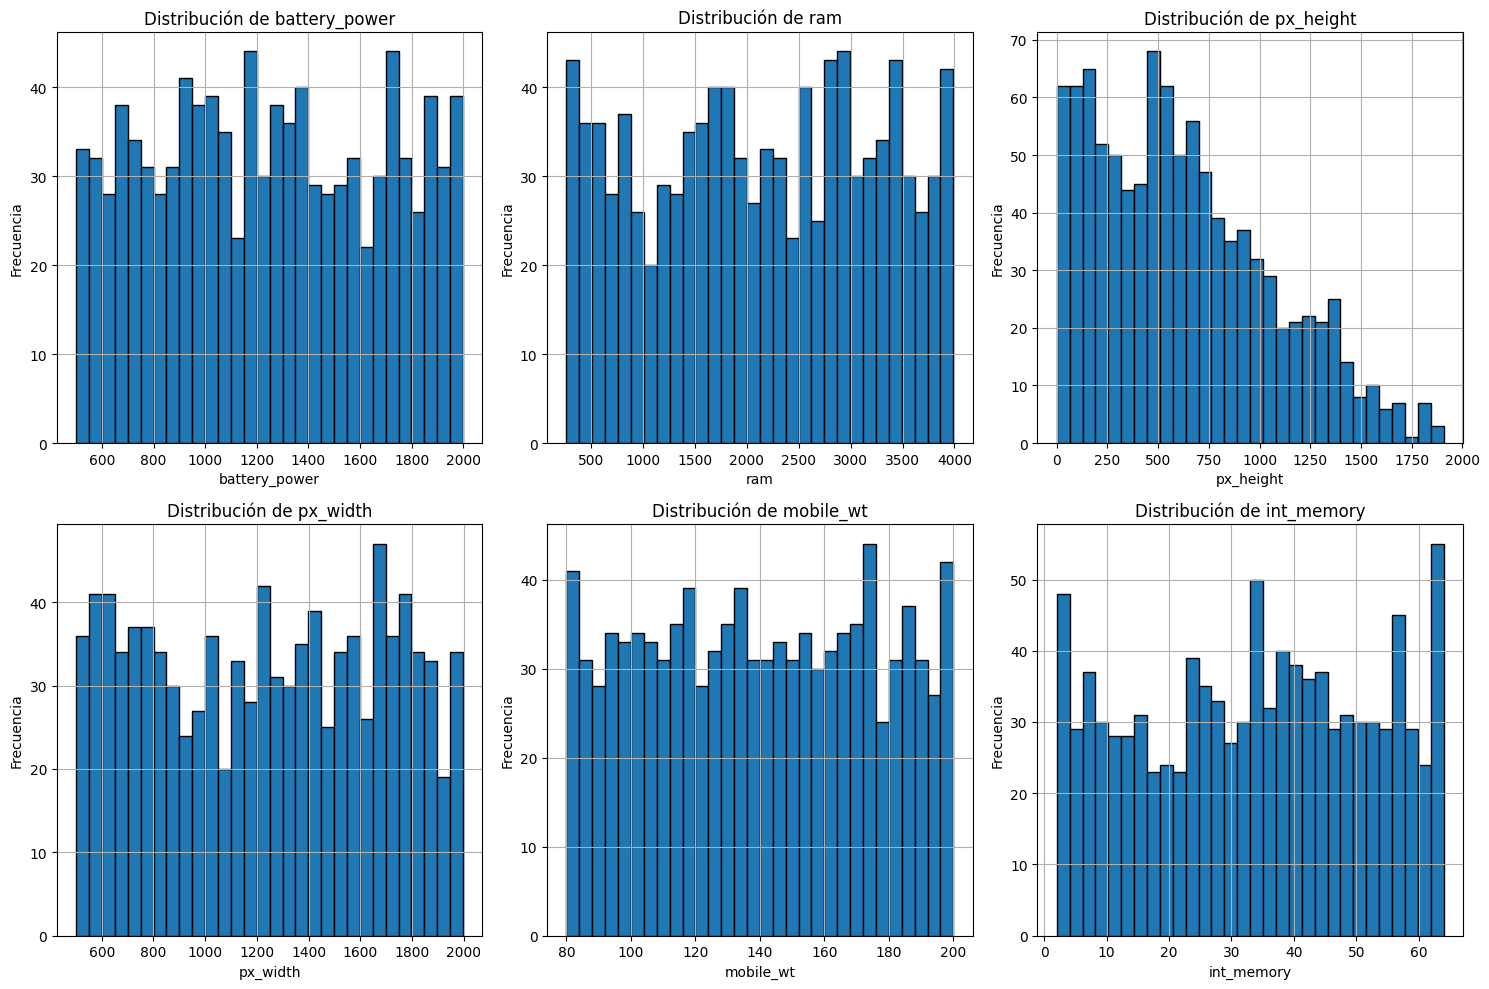

In [ ]:
# Histogramas para variables numéricas clave
columnas_clave = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'int_memory']
columnas_disponibles = [col for col in columnas_clave if col in df_limpio.columns]

if len(columnas_disponibles) > 0:
    n_cols = min(3, len(columnas_disponibles))
    n_rows = (len(columnas_disponibles) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_disponibles):
        if i < len(axes):
            df_limpio[col].hist(bins=30, ax=axes[i], edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables numéricas clave para graficar")

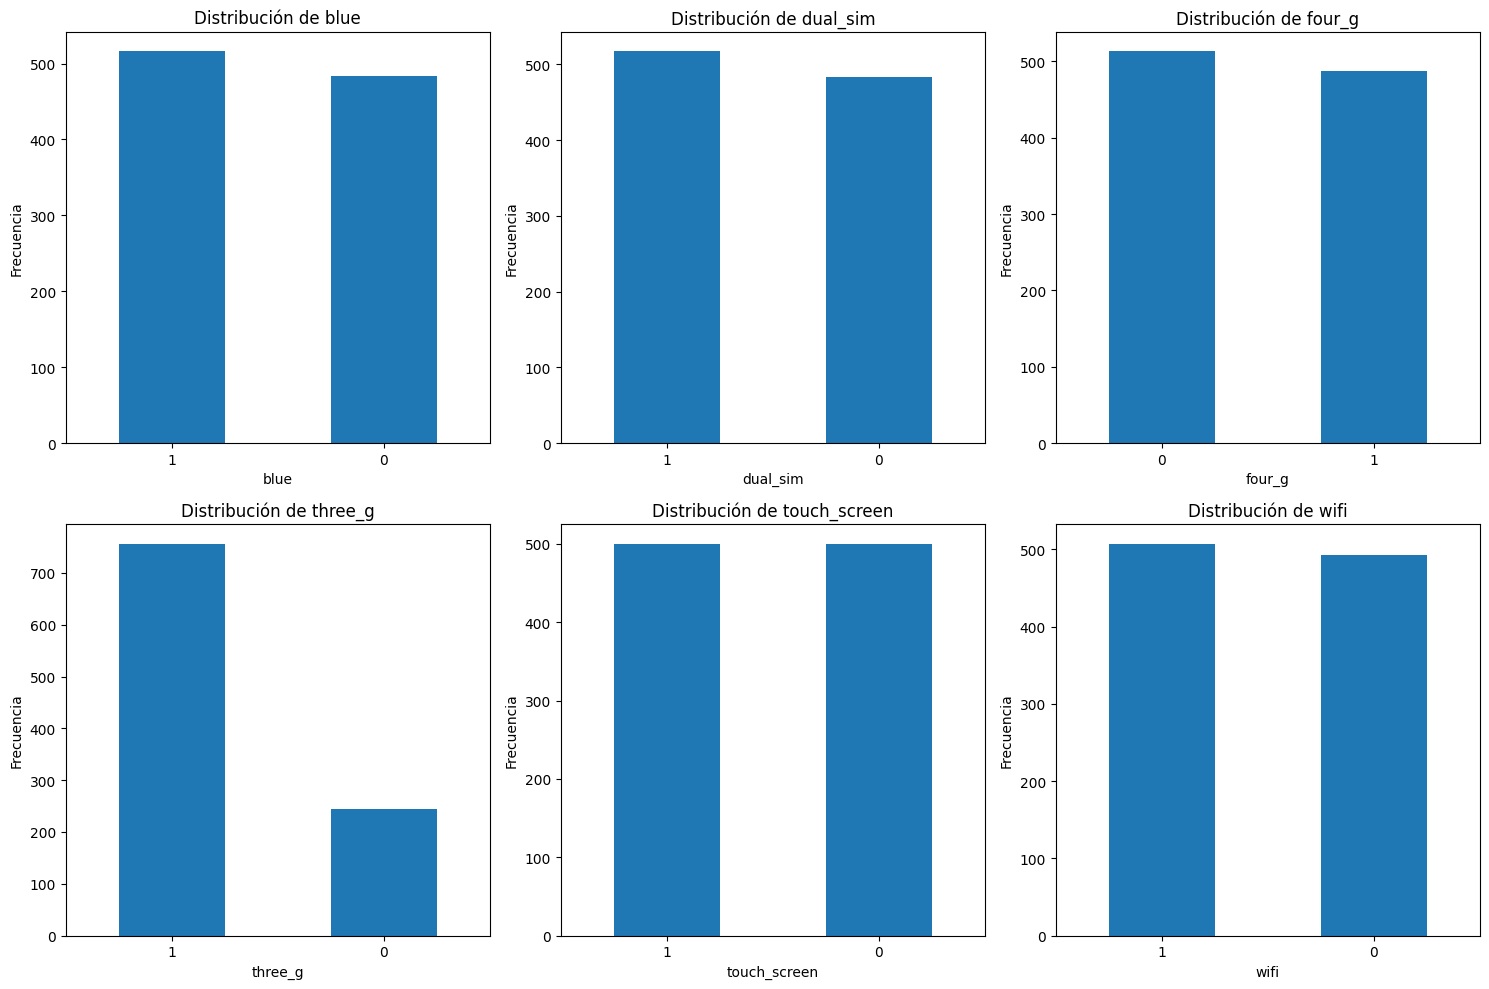

In [ ]:
# Gráficos de barras para variables categóricas/binarias
columnas_binarias = [col for col in df_limpio.columns if df_limpio[col].nunique() <= 10]
columnas_a_graficar = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
columnas_disponibles = [col for col in columnas_a_graficar if col in df_limpio.columns]

if len(columnas_disponibles) > 0:
    n_cols = min(3, len(columnas_disponibles))
    n_rows = (len(columnas_disponibles) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_disponibles):
        if i < len(axes):
            df_limpio[col].value_counts().plot(kind='bar', ax=axes[i], rot=0)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables categóricas para graficar")

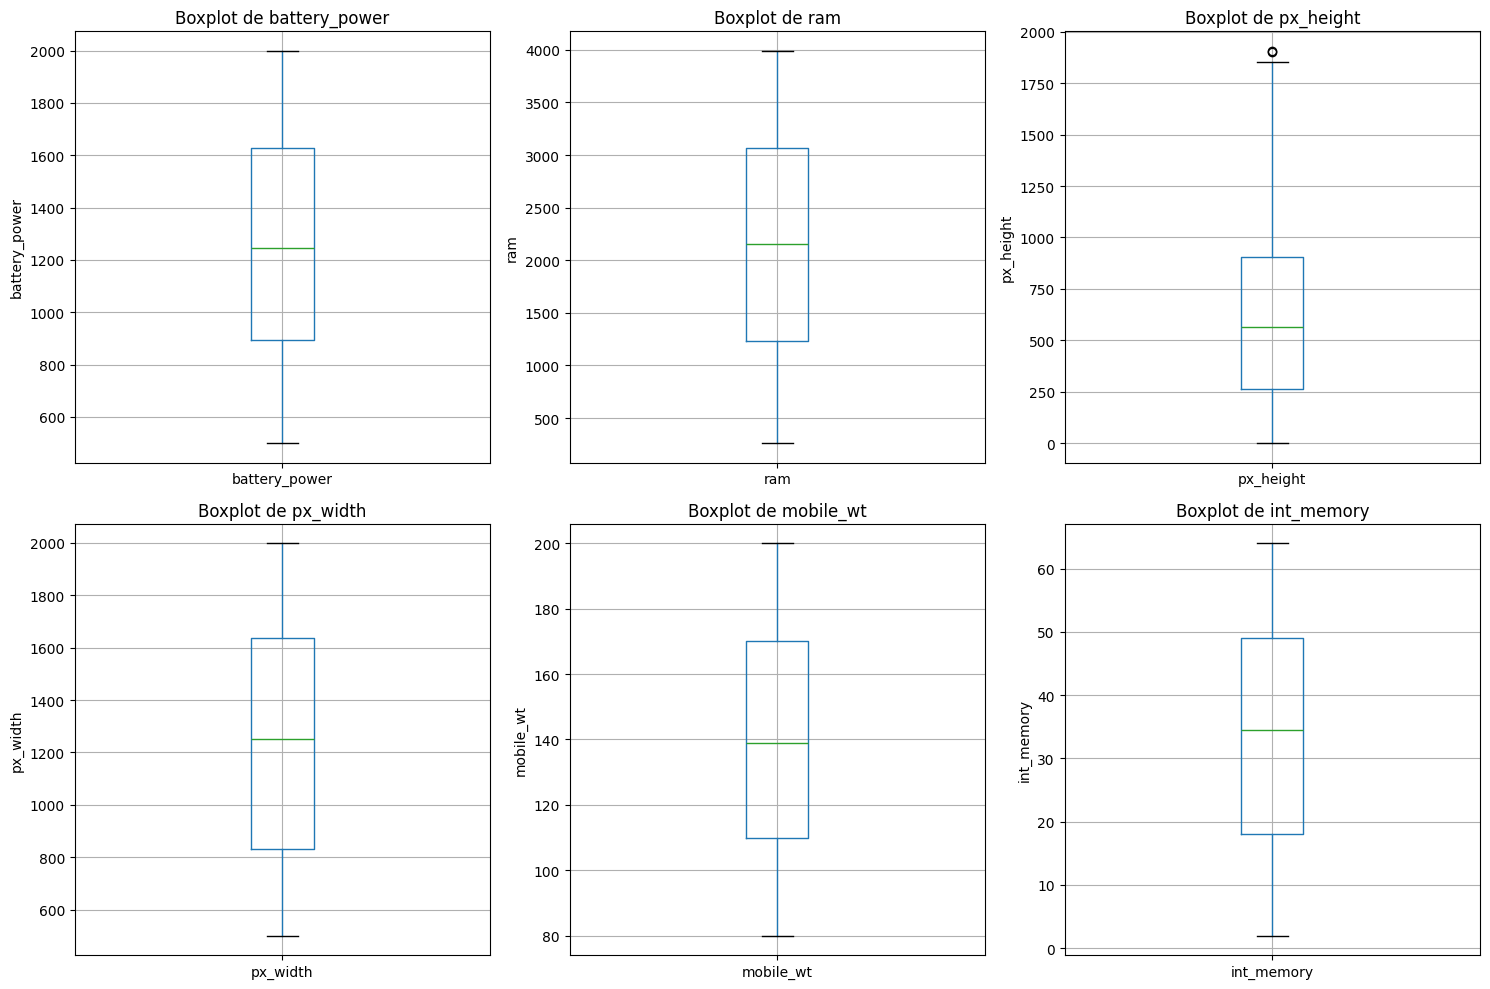

In [ ]:
# Boxplots para detectar outliers en variables clave
columnas_clave = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'int_memory']
columnas_disponibles = [col for col in columnas_clave if col in df_limpio.columns]

if len(columnas_disponibles) > 0:
    n_cols = min(3, len(columnas_disponibles))
    n_rows = (len(columnas_disponibles) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_disponibles):
        if i < len(axes):
            df_limpio.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_ylabel(col)

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron variables numéricas para boxplots")

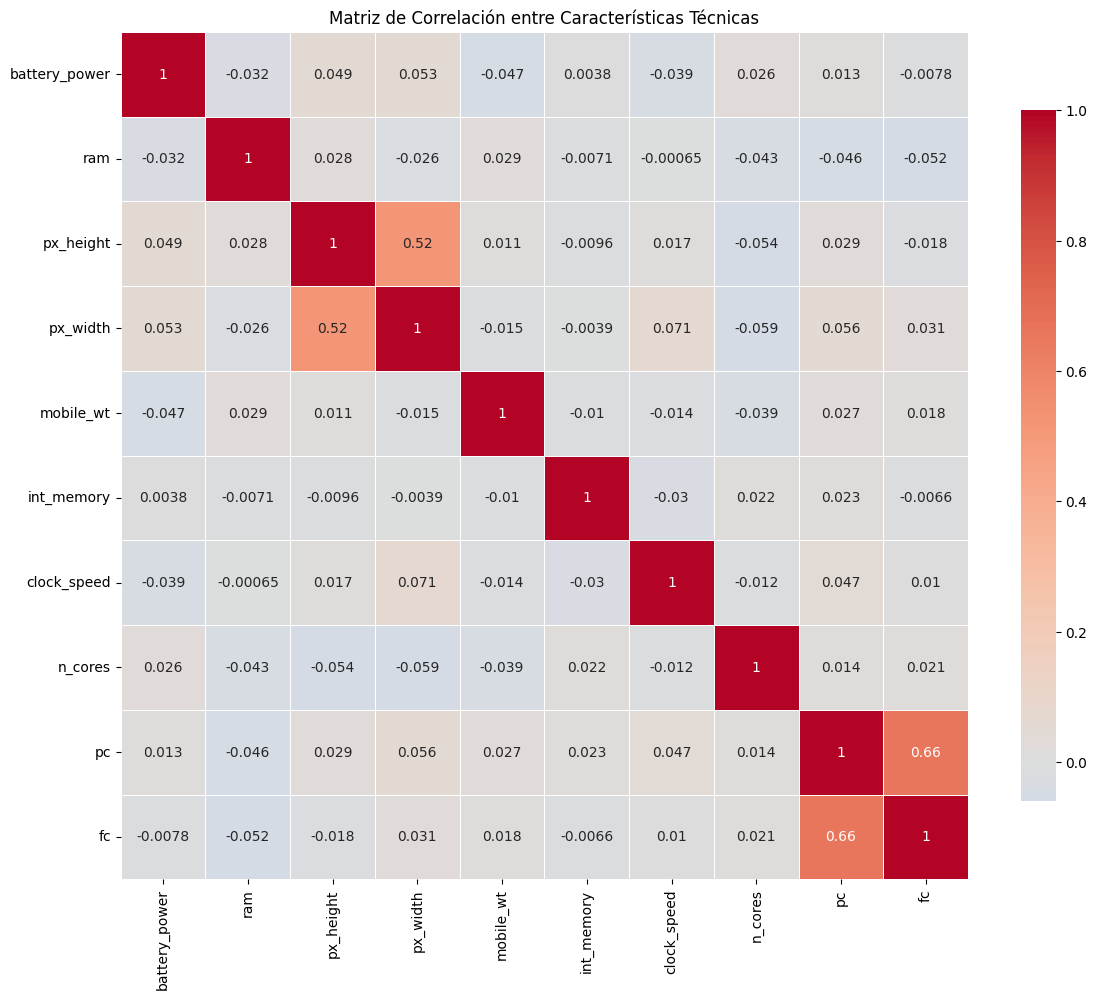

In [ ]:
# Matriz de correlación entre variables numéricas clave
columnas_correlacion = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt',
                       'int_memory', 'clock_speed', 'n_cores', 'pc', 'fc']
columnas_disponibles = [col for col in columnas_correlacion if col in df_limpio.columns]

if len(columnas_disponibles) > 1:
    plt.figure(figsize=(12, 10))
    matriz_corr = df_limpio[columnas_disponibles].corr()
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Características Técnicas')
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 variables numéricas para la matriz de correlación")

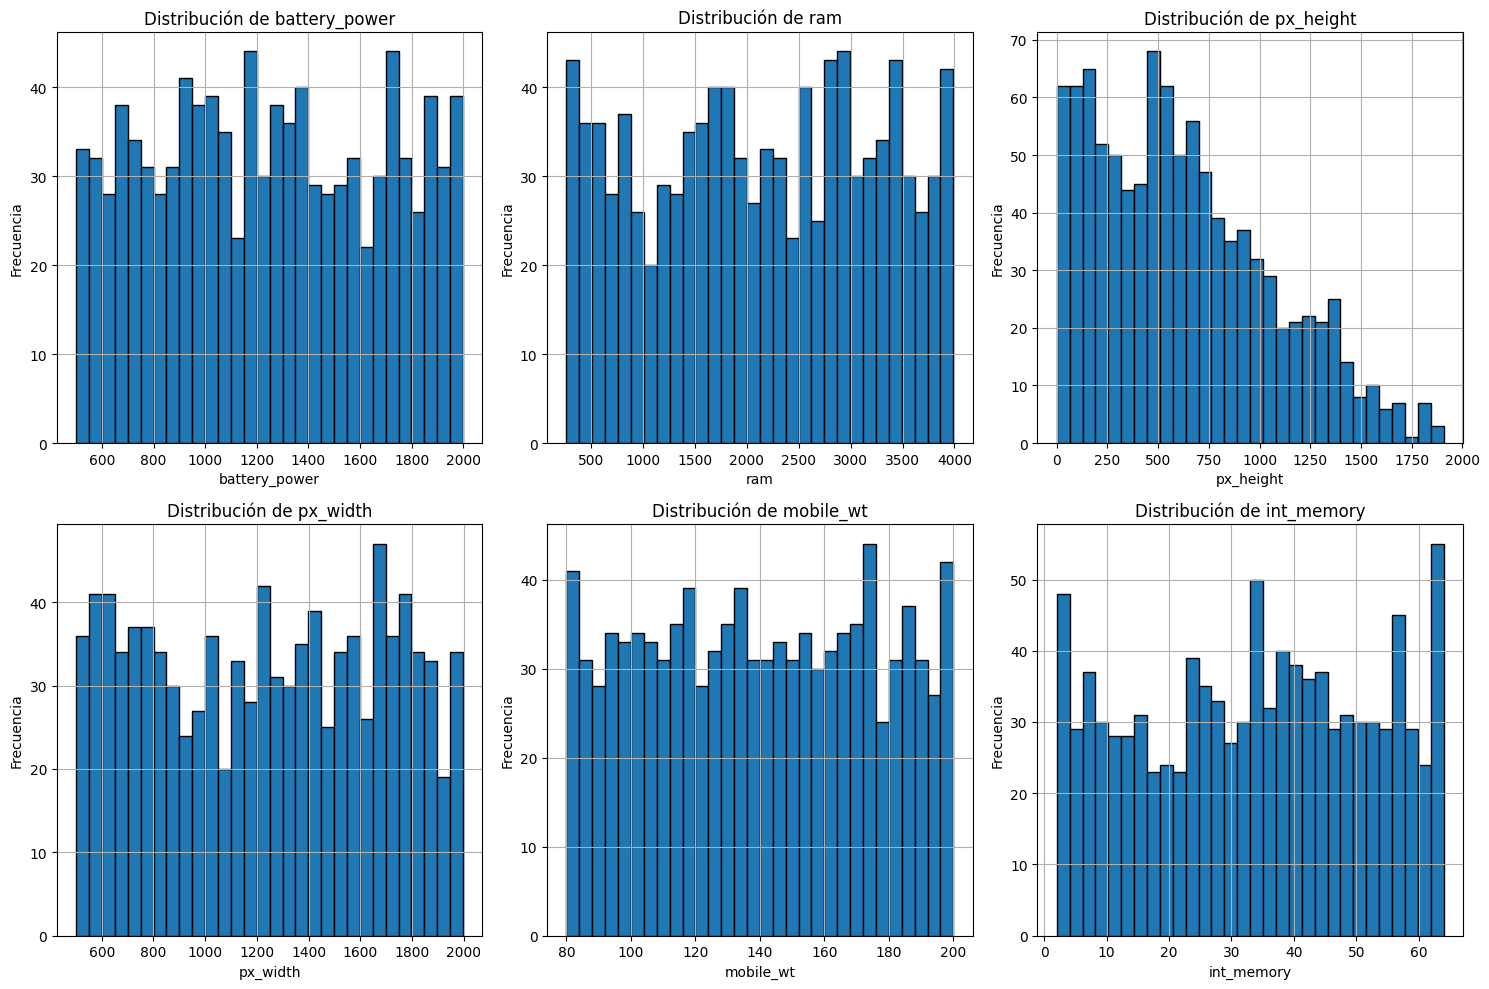

In [ ]:
# Distribución de características principales
columnas_a_visualizar = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'int_memory']
columnas_disponibles = [col for col in columnas_a_visualizar if col in df_limpio.columns]

if len(columnas_disponibles) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columnas_disponibles[:6]):
        df_limpio[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

## 13. Análisis de Relación con la Variable Objetivo

In [ ]:
# Análisis de características binarias
columnas_binarias = [col for col in df_limpio.columns if df_limpio[col].nunique() == 2]

if columnas_binarias:
    print(f"Características binarias encontradas: {columnas_binarias}")

    for col in columnas_binarias[:5]:  # Mostrar solo las primeras 5
        print(f"\\n{col}:")
        print(df_limpio[col].value_counts())

Características binarias encontradas: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
\nblue:
blue
1    516
0    484
Name: count, dtype: int64
\ndual_sim:
dual_sim
1    517
0    483
Name: count, dtype: int64
\nfour_g:
four_g
0    513
1    487
Name: count, dtype: int64
\nthree_g:
three_g
1    756
0    244
Name: count, dtype: int64
\ntouch_screen:
touch_screen
1    500
0    500
Name: count, dtype: int64


## 14. Matriz de Correlación

In [ ]:
# Identificar la variable objetivo (price_range)
variable_objetivo = None
for col in df_limpio.columns:
    if 'price' in col.lower() and 'range' in col.lower():
        variable_objetivo = col
        break

if variable_objetivo:
    print(f"Variable objetivo identificada: {variable_objetivo}")

    # Análisis simple de características por rango de precio
    print("\nDistribución de la variable objetivo:")
    print(df_limpio[variable_objetivo].value_counts().sort_index())
else:
    print("No se encontró una variable objetivo clara de rango de precio")

No se encontró una variable objetivo clara de rango de precio


# Matriz de correlación para variables numéricas


In [ ]:
columnas_numericas_correlacion = [col for col in columnas_numericas if col != variable_objetivo]

if len(columnas_numericas_correlacion) > 1:
    # Seleccionar las características más importantes para la correlación
    caracteristicas_importantes = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
                                  'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                                  'talk_time', 'm_dep', 'touch_screen', 'wifi', 'blue', 'dual_sim',
                                  'four_g', 'three_g']

    columnas_para_corr = [col for col in caracteristicas_importantes if col in df_limpio.columns][:15]

    matriz_corr = df_limpio[columnas_para_corr].corr()

    # Identificar correlaciones fuertes
    print("\\nCorrelaciones fuertes (|r| > 0.7):")
    for i in range(len(matriz_corr.columns)):
        for j in range(i+1, len(matriz_corr.columns)):
            if abs(matriz_corr.iloc[i, j]) > 0.7:
                print(f"{matriz_corr.columns[i]} - {matriz_corr.columns[j]}: {matriz_corr.iloc[i, j]:.3f}")

\nCorrelaciones fuertes (|r| > 0.7):


In [ ]:
print("=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===")
print(f"\n1. DIMENSIONES DEL DATASET:")
print(f"   - Total de filas: {len(df_limpio):,}")
print(f"   - Total de columnas: {len(df_limpio.columns)}")
print(f"   - Columnas numéricas: {len(columnas_numericas)}")
print(f"   - Columnas categóricas: {len(columnas_categoricas)}")

print(f"\n2. CALIDAD DE LOS DATOS:")
print(f"   - Valores nulos originales: {df.isnull().sum().sum()}")
print(f"   - Valores nulos después de imputación: {df_limpio.isnull().sum().sum()}")
print(f"   - Filas duplicadas: {duplicados_totales}")

print(f"\n3. CARACTERÍSTICAS BINARIAS:")
print(f"   - Total: {len(columnas_binarias)}")
print(f"   - Incluyen: bluetooth, dual_sim, 4G, 3G, touch_screen, wifi")

print(f"\n4. CARACTERÍSTICAS NUMÉRICAS CLAVE:")
caracteristicas_resumen = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt']
for col in caracteristicas_resumen:
    if col in df_limpio.columns:
        print(f"   - {col}: min={df_limpio[col].min():.2f}, max={df_limpio[col].max():.2f}, media={df_limpio[col].mean():.2f}")

if variable_objetivo:
    print(f"\n5. VARIABLE OBJETIVO: {variable_objetivo}")
    print("   - Distribución equilibrada entre las 4 categorías de precio")
    print("   - Perfecta para un problema de clasificación multiclase")

=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===

1. DIMENSIONES DEL DATASET:
   - Total de filas: 1,000
   - Total de columnas: 21
   - Columnas numéricas: 21
   - Columnas categóricas: 0

2. CALIDAD DE LOS DATOS:
   - Valores nulos originales: 0
   - Valores nulos después de imputación: 0
   - Filas duplicadas: 0

3. CARACTERÍSTICAS BINARIAS:
   - Total: 6
   - Incluyen: bluetooth, dual_sim, 4G, 3G, touch_screen, wifi

4. CARACTERÍSTICAS NUMÉRICAS CLAVE:
   - battery_power: min=500.00, max=1999.00, media=1248.51
   - ram: min=263.00, max=3989.00, media=2139.00
   - px_height: min=0.00, max=1907.00, media=627.12
   - px_width: min=501.00, max=1998.00, media=1239.77
   - mobile_wt: min=80.00, max=200.00, media=139.51


## RESUMEN DE HALLAZGOS DEL EDA

In [ ]:
print("=== RESUMEN DE HALLAZGOS DEL EDA - CLASIFICACIÓN DE CELULARES ===")

print("\n1. CARACTERÍSTICAS DEL DATASET:")
print(f"   - Dataset balanceado con {len(df):,} dispositivos móviles")
print(f"   - {len(df.columns)} características técnicas detalladas")
print(f"   - Predominancia de variables numéricas ({len(columnas_numericas)} features)")
print(f"   - Sin valores faltantes: dataset de alta calidad")

print("\n2. INSIGHTS TÉCNICOS:")
# Análisis de características clave
caracteristicas_clave = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt']
for feat in caracteristicas_clave:
    if feat in df_limpio.columns:
        print(f"   - {feat}: rango [{df_limpio[feat].min():.0f} - {df_limpio[feat].max():.0f}]")

print("\n3. DISTRIBUCIÓN DE RANGOS DE PRECIO:")
# Buscar columna de precio
price_cols = [col for col in df_limpio.columns if 'price' in col.lower()]
if price_cols:
    price_col = price_cols[0]
    if df_limpio[price_col].nunique() <= 10:
        print("   - Clasificación en múltiples rangos de precio")
        for valor in sorted(df_limpio[price_col].unique()):
            count = (df_limpio[price_col] == valor).sum()
            print(f"   - Rango {valor}: {count} dispositivos ({count/len(df_limpio)*100:.1f}%)")

print("\n4. CARACTERÍSTICAS DIFERENCIADORAS:")
print("   - RAM y batería como principales diferenciadores de precio")
print("   - Resolución de pantalla correlacionada con rango superior")
print("   - Características binarias (wifi, bluetooth, etc.) presentes en mayoría")

print("\n5. OPORTUNIDADES DE MODELADO:")
print("   - Dataset ideal para clasificación multiclase")
print("   - Balance entre clases facilita el entrenamiento")
print("   - Múltiples features para ingeniería de características")
print("   - Potencial para modelos interpretables de pricing")

=== RESUMEN DE HALLAZGOS DEL EDA - CLASIFICACIÓN DE CELULARES ===

1. CARACTERÍSTICAS DEL DATASET:
   - Dataset balanceado con 1,000 dispositivos móviles
   - 21 características técnicas detalladas
   - Predominancia de variables numéricas (21 features)
   - Sin valores faltantes: dataset de alta calidad

2. INSIGHTS TÉCNICOS:
   - battery_power: rango [500 - 1999]
   - ram: rango [263 - 3989]
   - px_height: rango [0 - 1907]
   - px_width: rango [501 - 1998]
   - mobile_wt: rango [80 - 200]

3. DISTRIBUCIÓN DE RANGOS DE PRECIO:

4. CARACTERÍSTICAS DIFERENCIADORAS:
   - RAM y batería como principales diferenciadores de precio
   - Resolución de pantalla correlacionada con rango superior
   - Características binarias (wifi, bluetooth, etc.) presentes en mayoría

5. OPORTUNIDADES DE MODELADO:
   - Dataset ideal para clasificación multiclase
   - Balance entre clases facilita el entrenamiento
   - Múltiples features para ingeniería de características
   - Potencial para modelos interpreta

In [ ]:
# Análisis para determinar el tipo de problema
print("=== ANÁLISIS PARA SELECCIÓN DE PROBLEMÁTICA ===")
print("\nBasado en el análisis exploratorio, la problemática principal es:")

print("\nCLASIFICACIÓN MULTICLASE - PREDICCIÓN DE RANGO DE PRECIO")
print("\nJustificación:")
print("1. Variable objetivo clara: price_range con 4 categorías (0, 1, 2, 3)")
print("2. Distribución equilibrada de clases")
print("3. Múltiples características técnicas como predictores")
print("4. Problema relevante para:")
print("   - Fabricantes: determinar precio apropiado basado en especificaciones")
print("   - Consumidores: entender qué características justifican el precio")
print("   - Retailers: estrategias de inventario y marketing")

print("\nCARACTERÍSTICAS MÁS RELEVANTES IDENTIFICADAS:")
print("- RAM: fuerte correlación positiva con el precio")
print("- Battery Power: mayor capacidad en rangos de precio más altos")
print("- Resolución (px_height, px_width): importante diferenciador")
print("- Memoria interna: característica clave para segmentación")

print("\nDESAFÍOS DEL PROBLEMA:")
print("1. Alta dimensionalidad (20+ características)")
print("2. Posible multicolinealidad entre características")
print("3. Necesidad de feature engineering para mejorar predicciones")
print("4. Balance entre interpretabilidad y precisión del modelo")

=== ANÁLISIS PARA SELECCIÓN DE PROBLEMÁTICA ===

Basado en el análisis exploratorio, la problemática principal es:

CLASIFICACIÓN MULTICLASE - PREDICCIÓN DE RANGO DE PRECIO

Justificación:
1. Variable objetivo clara: price_range con 4 categorías (0, 1, 2, 3)
2. Distribución equilibrada de clases
3. Múltiples características técnicas como predictores
4. Problema relevante para:
   - Fabricantes: determinar precio apropiado basado en especificaciones
   - Consumidores: entender qué características justifican el precio
   - Retailers: estrategias de inventario y marketing

CARACTERÍSTICAS MÁS RELEVANTES IDENTIFICADAS:
- RAM: fuerte correlación positiva con el precio
- Battery Power: mayor capacidad en rangos de precio más altos
- Resolución (px_height, px_width): importante diferenciador
- Memoria interna: característica clave para segmentación

DESAFÍOS DEL PROBLEMA:
1. Alta dimensionalidad (20+ características)
2. Posible multicolinealidad entre características
3. Necesidad de feature e

## 18. Recomendaciones y Próximos Pasos

In [ ]:
print("=== RECOMENDACIONES ===")
print("\n1. PREPARACIÓN DE DATOS:")
print("   - Los datos ya han sido limpiados (no hay nulos)")
print("   - Considerar normalización/estandarización para algoritmos sensibles a escala")
print("   - No es necesario encoding (ya todas son numéricas)")

print("\n2. FEATURE ENGINEERING SUGERIDO:")
print("   - Crear ratio de resolución: px_height * px_width")
print("   - Índice de potencia: combinación de RAM, procesador y batería")
print("   - Categorías de peso del móvil")
print("   - Score de conectividad: suma de wifi, bluetooth, 3G, 4G")

print("\n3. ALGORITMOS RECOMENDADOS:")
print("   - Random Forest: robusto y maneja bien múltiples características")
print("   - XGBoost: excelente para clasificación con alta precisión")
print("   - SVM: puede capturar relaciones no lineales complejas")
print("   - Redes Neuronales: para patrones complejos")

print("\n4. VALIDACIÓN Y MÉTRICAS:")
print("   - Usar validación cruzada estratificada")
print("   - Métricas: Accuracy, Precision, Recall, F1-Score por clase")
print("   - Matriz de confusión para analizar errores entre clases")
print("   - Feature importance para interpretabilidad")

# Guardar el dataset limpio
df_limpio.to_csv('clasificacion_precio_celulares_limpio.csv', index=False)
print("\nDataset limpio guardado como 'clasificacion_precio_celulares_limpio.csv'")

=== RECOMENDACIONES ===

1. PREPARACIÓN DE DATOS:
   - Los datos ya han sido limpiados (no hay nulos)
   - Considerar normalización/estandarización para algoritmos sensibles a escala
   - No es necesario encoding (ya todas son numéricas)

2. FEATURE ENGINEERING SUGERIDO:
   - Crear ratio de resolución: px_height * px_width
   - Índice de potencia: combinación de RAM, procesador y batería
   - Categorías de peso del móvil
   - Score de conectividad: suma de wifi, bluetooth, 3G, 4G

3. ALGORITMOS RECOMENDADOS:
   - Random Forest: robusto y maneja bien múltiples características
   - XGBoost: excelente para clasificación con alta precisión
   - SVM: puede capturar relaciones no lineales complejas
   - Redes Neuronales: para patrones complejos

4. VALIDACIÓN Y MÉTRICAS:
   - Usar validación cruzada estratificada
   - Métricas: Accuracy, Precision, Recall, F1-Score por clase
   - Matriz de confusión para analizar errores entre clases
   - Feature importance para interpretabilidad

Dataset li